# Feature Selection And The Model Training

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [11]:
df.columns=df.columns.str.strip()

In [12]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [14]:
## Features Encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


In [16]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
246,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [17]:
df['Classes'].value_counts()

Classes
1    138
0    109
Name: count, dtype: int64

In [19]:
# Devide the Features into Independent And the Dependent Features
X=df.drop('FWI',axis=1)
Y=df['FWI']

In [23]:
X.head()
Y

0      0.5
1      0.4
2      0.1
3        0
4      0.5
      ... 
242    6.5
243      0
244    0.2
245    0.7
246    0.5
Name: FWI, Length: 247, dtype: object

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [28]:
x_train.shape

(185, 10)

# Feature Selection Based on The Correlation

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: >

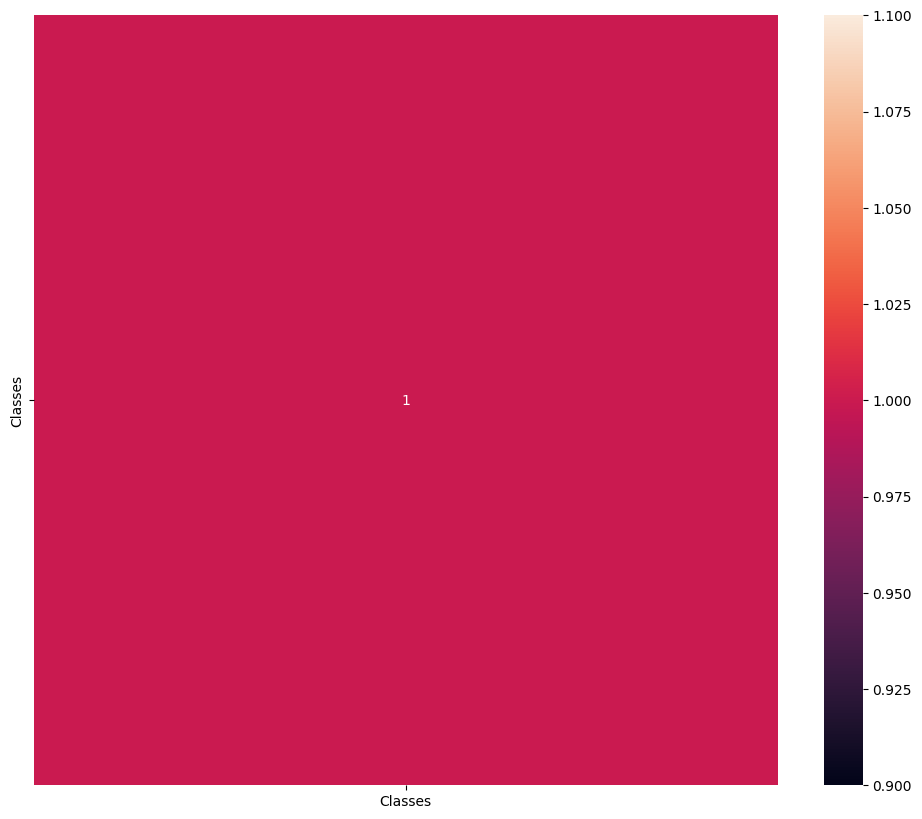

In [42]:
plt.figure(figsize=(12,10))
corr = x_train.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)



In [44]:
# Sandardization
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit(x_test)

ValueError: could not convert string to float: 'Temperature'